In [1]:
from matplotlib import pyplot as plt
from graph import create_random_graph , to_useful, assign_states
import networkx as nx
from model import create_model
import tensorflow as tf
from mutate import mutate_dag
from crossover import crossover
from Individual import Individual
from Generation import Generation

2023-12-05 15:07:49.684453: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-05 15:07:49.689867: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-05 15:07:49.771834: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-05 15:07:49.771885: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-05 15:07:49.773875: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

input


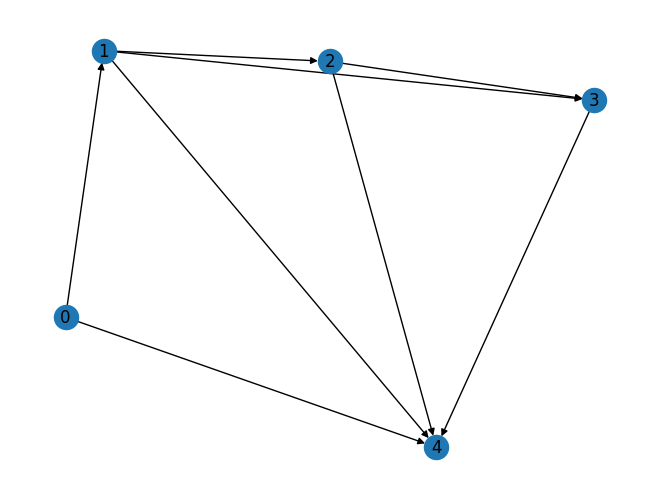

In [2]:
g1 = create_random_graph(5,0.8)
g1 = assign_states(g1,(1,3,1))
print(g1.nodes[0]['state'])
nx.draw(g1, with_labels=True)
plt.draw()

0 1
True
0 2
True
0 3
True
1 4
True
2 4
True
3 4
True


OutEdgeDataView([(0, 1, {'_igraph_index': 0}), (0, 4, {'_igraph_index': 4}), (1, 2, {'_igraph_index': 1}), (1, 3, {'_igraph_index': 2}), (1, 4, {'_igraph_index': 5}), (2, 3, {'_igraph_index': 3}), (2, 4, {'_igraph_index': 6}), (3, 4, {'_igraph_index': 7})])

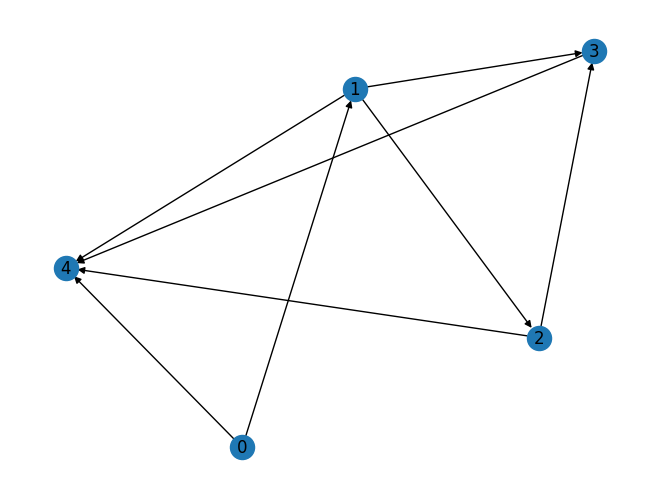

In [3]:
g1 = to_useful(g1,(1,3,1))
nx.draw(g1, with_labels=True)
plt.draw()
g1.edges(data=True)

In [4]:
g1.nodes

NodeView((0, 1, 2, 3, 4))

In [5]:
import mnist
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf

mnist = tf.keras.datasets.mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 225
x_test = x_test / 225


/home/balasai/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
model = create_model(g1,(28,28,1),10)

[0, 1, 2, 3] {0: <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_layer')>, 1: <KerasTensor: shape=(None, 28, 28, 4) dtype=float32 (created by layer '1')>, 2: <KerasTensor: shape=(None, 28, 28, 7) dtype=float32 (created by layer '2')>, 3: <KerasTensor: shape=(None, 28, 28, 11) dtype=float32 (created by layer '3')>}
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer '4')>]


In [7]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 1 (Dense)                   (None, 28, 28, 4)            8         ['input_layer[0][0]']         
                                                                                                  
 2 (Dense)                   (None, 28, 28, 7)            35        ['1[0][0]']                   
                                                                                                  
 3_concatenate (Concatenate  (None, 28, 28, 11)           0         ['1[0][0]',                   
 )                                                                   '2[0][0]']               

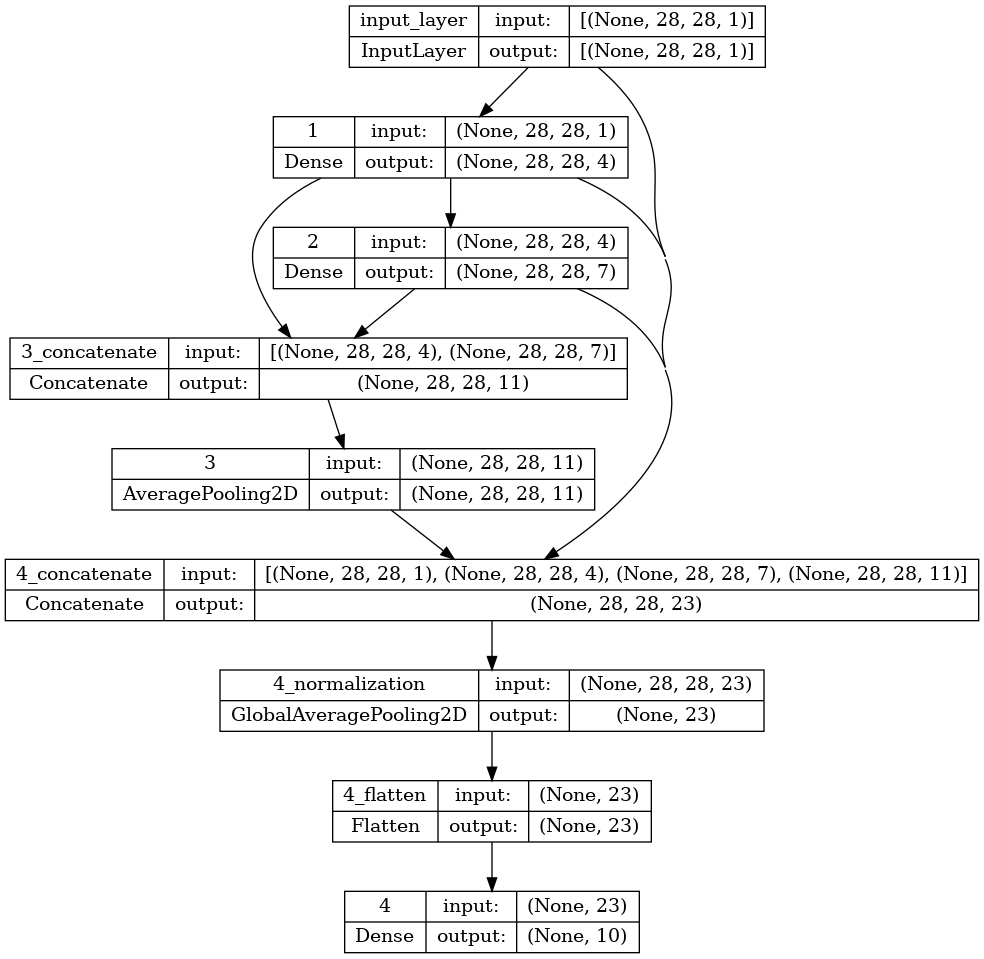

In [9]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [10]:
#model.fit(train_images, train_labels, epochs=10, batch_size=64)
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 2.3044 - accuracy: 0.1028


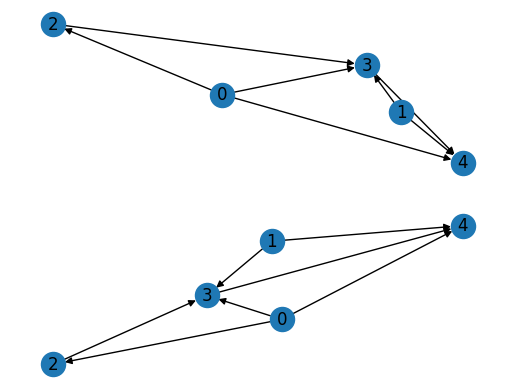

In [11]:
g1 = create_random_graph(5,0.5)
g1 = assign_states(g1,(1,3,1))
fig , ax = plt.subplots(2,1)
g3 = mutate_dag(g1)
nx.draw(g1, with_labels=True, ax=ax[0])
nx.draw(g3, with_labels=True, ax=ax[1])
plt.draw()


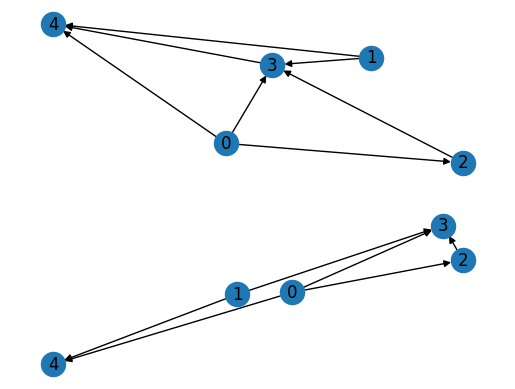

In [12]:
g4 = crossover(g1,g3)
fig , ax = plt.subplots(2,1)
nx.draw(g1, with_labels=True, ax=ax[0])
nx.draw(g4, with_labels=True, ax=ax[1])
plt.draw()

0 1
True
0 2
True
0 3
True
1 4
True
2 4
True
3 4
True


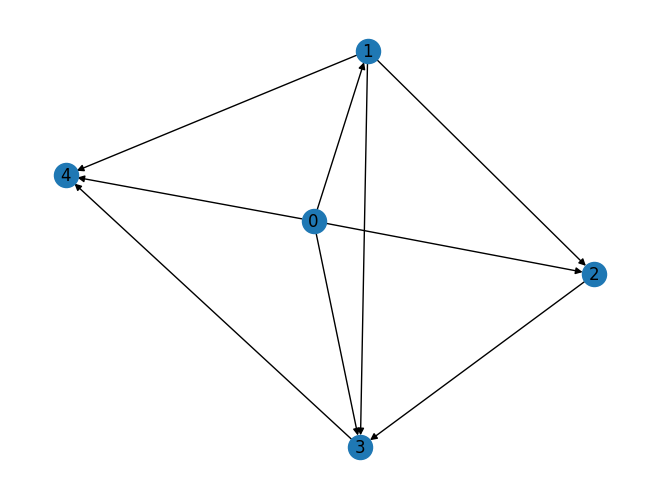

[0, 1, 3] {0: <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_layer')>, 1: <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer '1')>, 2: <KerasTensor: shape=(None, 28, 28, 9) dtype=float32 (created by layer '2')>, 3: <KerasTensor: shape=(None, 28, 28, 8) dtype=float32 (created by layer '3')>}
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer '4')>]
Epoch 1/5
2141/4800 [============>.................] - ETA: 24s - loss: 0.3782 - accuracy: 0.1116

4800/4800 [==============================] - 47s 10ms/step - loss: 0.3480 - accuracy: 0.1442
Epoch 2/5
3152/4800 [==================>...........] - ETA: 16s - loss: 0.3211 - accuracy: 0.1894

In [13]:
in1 = Individual((28,28,1),(10),(1,3,1),5,0.9)
in1.score(x_train,y_train)

0 1
True
0 2
True
0 3
True
1 4
True
2 4
True
3 4
True


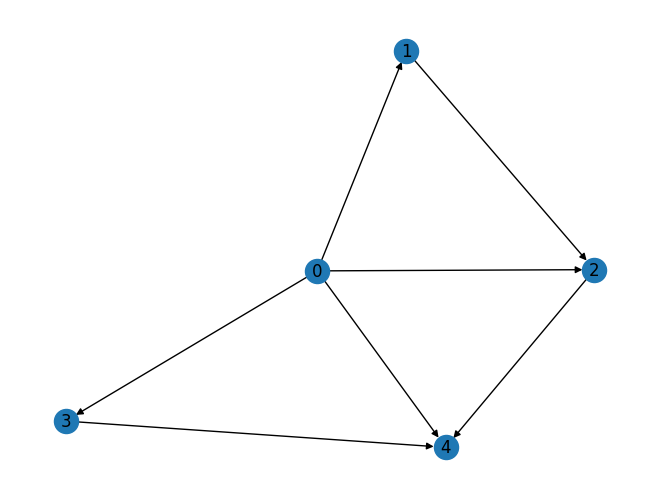

[0, 2, 3] {0: <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_layer')>, 1: <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer '1')>, 3: <KerasTensor: shape=(None, 28, 28, 6) dtype=float32 (created by layer '3')>, 2: <KerasTensor: shape=(None, 28, 28, 2) dtype=float32 (created by layer '2')>}
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer '4')>]
0 1
False
removing j
0 2
False
removing j
0 3
True
1 4
2 4
3 4
True


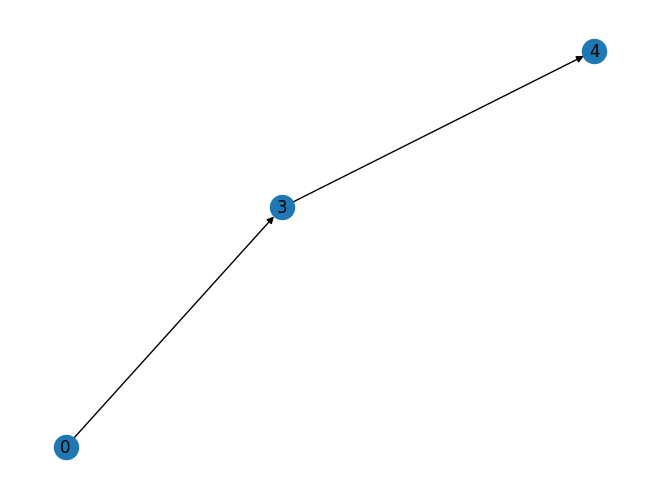

[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer '4')>]
0 1
True
0 2
True
0 3
True
1 4
True
2 4
True
3 4
True


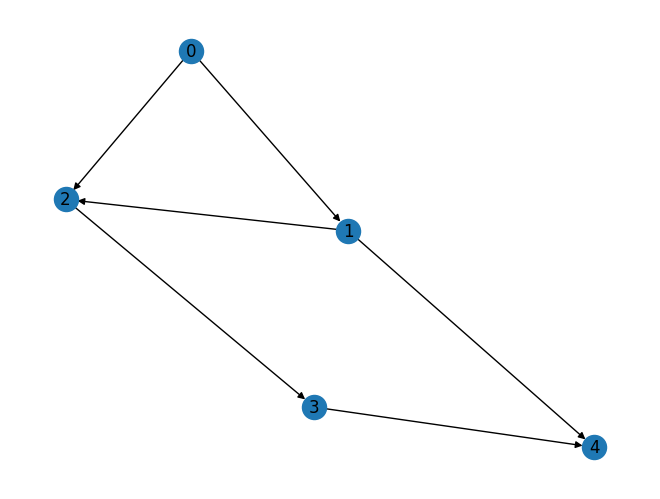

[1, 3] {0: <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_layer')>, 1: <KerasTensor: shape=(None, 28, 28, 15) dtype=float32 (created by layer '1')>, 2: <KerasTensor: shape=(None, 28, 28, 16) dtype=float32 (created by layer '2')>, 3: <KerasTensor: shape=(None, 28, 28, 16) dtype=float32 (created by layer '3')>}
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer '4')>]
Epoch 1/5
800/800 [==============================] - 2s 2ms/step - loss: 0.4401 - accuracy: 0.1034
Epoch 2/5
800/800 [==============================] - 2s 2ms/step - loss: 0.3258 - accuracy: 0.1571
Epoch 3/5
800/800 [==============================] - 2s 2ms/step - loss: 0.3249 - accuracy: 0.1619
Epoch 4/5
800/800 [==============================] - 2s 2ms/step - loss: 0.3239 - accuracy: 0.1829
Epoch 5/5
63/63 [==============================] - 0s 3ms/step
Epoch 1/5
800/800 [==============================] - 8s 9ms/step - loss: 0.5623 - accuracy: 0.0950
Epoch 2/5
800/800 [===========

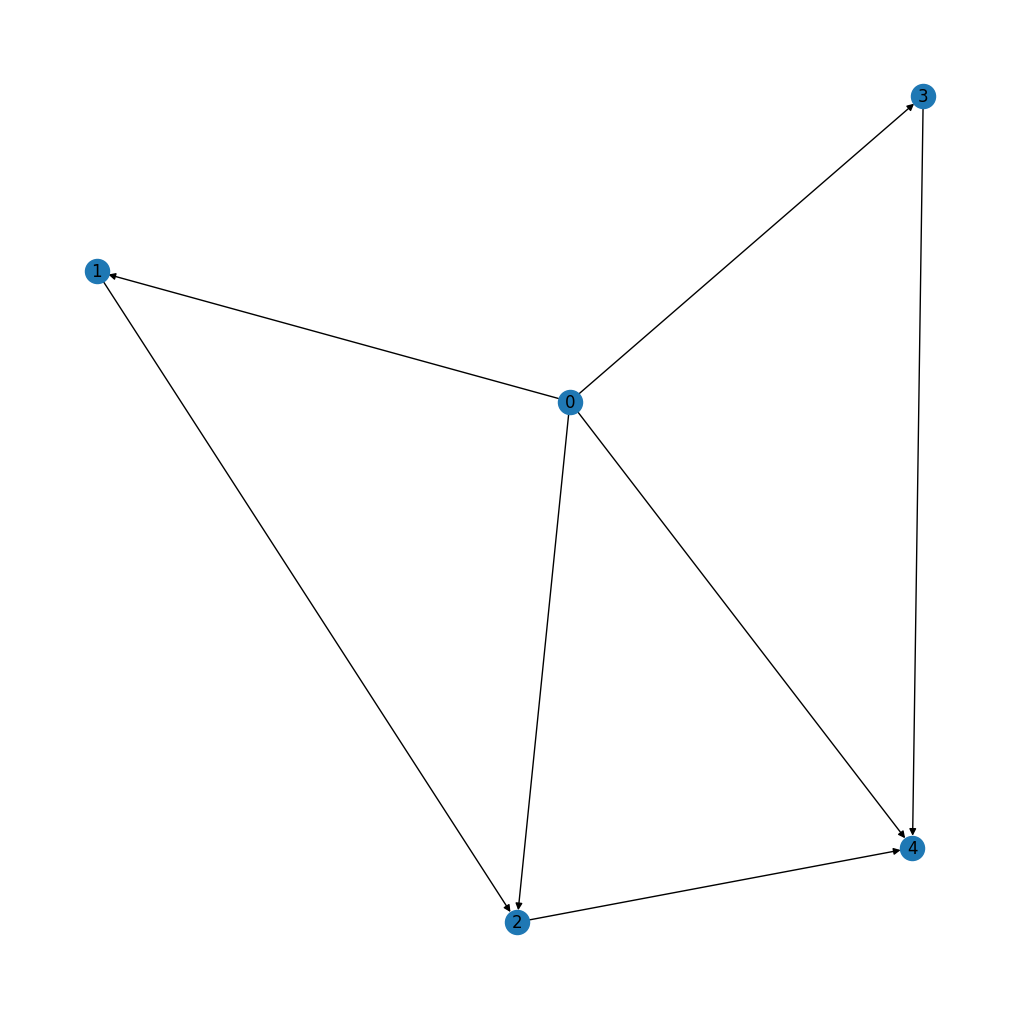

Best graph: None
Best ROC: 0.4994243405287059
---------------------------------------------------
Epoch 1/5
800/800 [==============================] - 2s 2ms/step - loss: 0.3217 - accuracy: 0.1978
Epoch 2/5
800/800 [==============================] - 2s 2ms/step - loss: 0.3205 - accuracy: 0.1951
Epoch 3/5
800/800 [==============================] - 2s 2ms/step - loss: 0.3193 - accuracy: 0.1970
Epoch 4/5
800/800 [==============================] - 2s 2ms/step - loss: 0.3181 - accuracy: 0.1966
Epoch 5/5
63/63 [==============================] - 0s 3ms/step
Epoch 1/5
800/800 [==============================] - 8s 9ms/step - loss: 0.3247 - accuracy: 0.1828
Epoch 2/5
800/800 [==============================] - 7s 9ms/step - loss: 0.3239 - accuracy: 0.1908
Epoch 3/5
800/800 [==============================] - 8s 10ms/step - loss: 0.3233 - accuracy: 0.1911
Epoch 4/5
800/800 [==============================] - 7s 9ms/step - loss: 0.3229 - accuracy: 0.1939
Epoch 5/5
63/63 [=============================

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Generation: 1
Best score: 0
Best parameters: 112
Best loss: 0.31687456369400024
Best accuracy: 0.1977500021457672
Best history: <keras.src.callbacks.History object at 0x7f983ec94190>
Best model: <keras.src.engine.functional.Functional object at 0x7f983ec49b10>


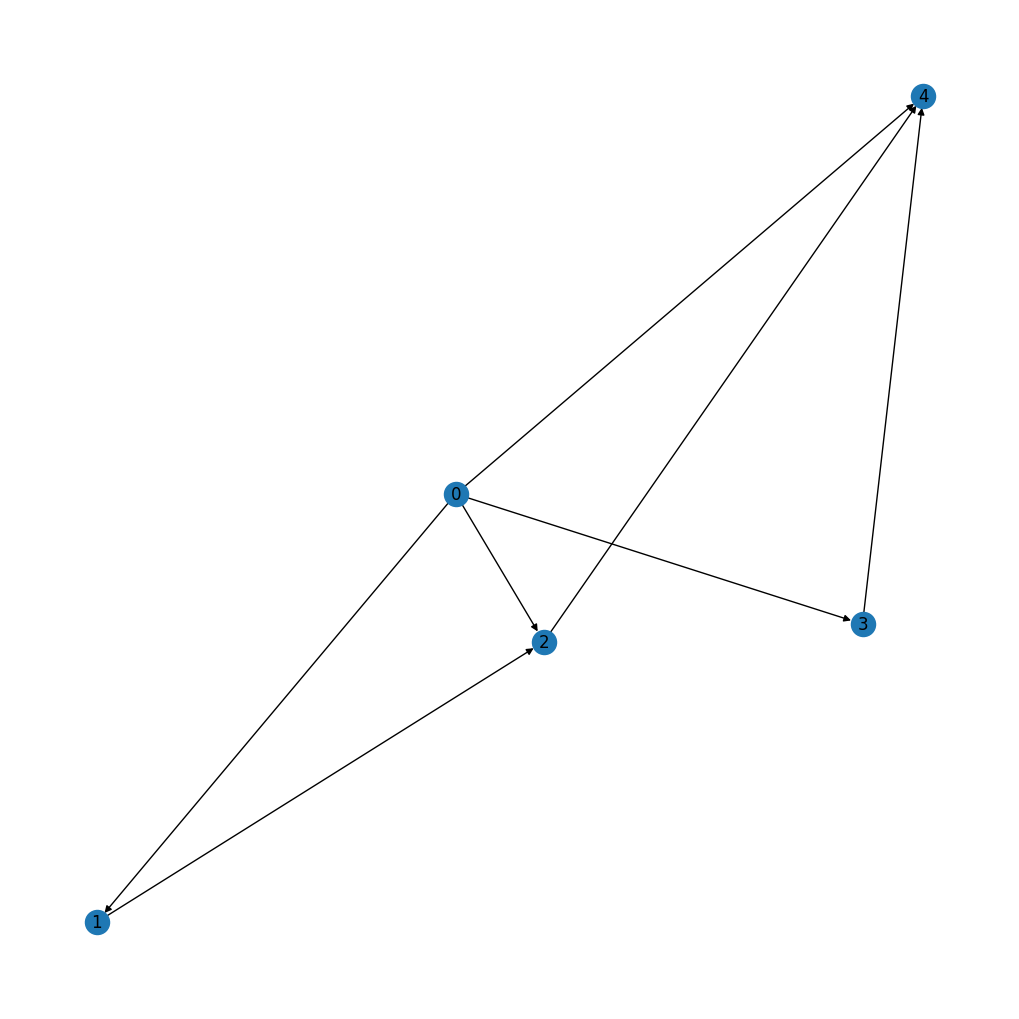

Best graph: None
Best ROC: 0.6304845152398826
---------------------------------------------------
Epoch 1/5
 53/800 [>.............................] - ETA: 1s - loss: 0.3159 - accuracy: 0.2189

: 

In [ ]:
ga = Generation(input_size=(28,28,1),output_size=(10),states=(1,3,1),nodes=5,edges=0.7,population=3,limit=7,X=train_images,y=train_labels)
ga.run(10,test_images,test_labels,0.1,0.1)